In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import codecs

# for MNIST

In [61]:
with open("tsallis_log.txt") as f:
    l = f.readlines()

In [62]:
counts_all = []
for x in [1, 3, 5, 7, 11, 15, 23]:
    all_labels = eval(l[x])

    counts = [0 for _ in range(9)]
    for labels in all_labels:
        n = len(labels)
        counts[n - 1] += 1

    counts_all.append(counts)
    print(counts, sep = "\n", file = codecs.open("for_icmla3.txt", 'a', 'utf-8'))

# for Fashion MNIST

In [63]:
with open("tsallis_fmnist_log.txt") as f:
    l = f.readlines()

In [64]:
counts_all = []
for x in [1, 3, 5, 7, 11, 15, 23]:
    all_labels = eval(l[x])

    counts = [0 for _ in range(9)]
    for labels in all_labels:
        n = len(labels)
        counts[n - 1] += 1

    counts_all.append(counts)
    print(counts, sep = "\n", file = codecs.open("for_icmla3.txt", 'a', 'utf-8'))

# graph

In [65]:
lnum = [i for i in range(1, 10)]

with open("for_icmla3.txt") as f:
    l = f.readlines()
    
# MNIST
mnist_counts = [[e/2000 for e in eval(l[i])] for i in [j + 1 for j in range(7)]]
# f_MNIST
fmnist_counts = [[e/2000 for e in eval(l[i])] for i in [j for j in range(9, 16)]]

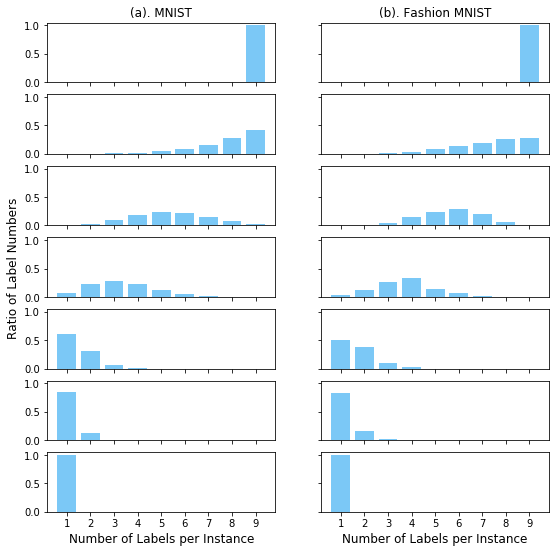

In [73]:
q_list = ['-inf', '10', '-1.0', '-0.5', '-0.1', '0.1', '+inf']
r = len(q_list)

FONTSIZE = 12

fig, axs = plt.subplots(r, 2, sharex = True, sharey = True, figsize = (9, 9))

x_pos = [i for i in range(1, 10)]
x_ticks = [str(e) for e in x_pos]
y_pos = [0.00, 0.50, 1.00]
y_ticks = [str(e) for e in y_pos]

colour = 'xkcd:lightblue'

for i, q in enumerate(q_list):
    # for MNIST
    axs[i, 0].bar(lnum, mnist_counts[i], color = colour)
    axs[i, 0].set_xticks(x_pos)
    axs[i, 0].set_xticklabels(x_ticks)
    axs[i, 0].set_yticks(y_pos)
    axs[i, 0].set_yticklabels(y_ticks)
    # for f_MNIST
    axs[i, 1].bar(lnum, fmnist_counts[i], color = colour)
    axs[i, 1].set_xticks(x_pos)
    axs[i, 1].set_xticklabels(x_ticks)
    axs[i, 1].set_yticks(y_pos)
    axs[i, 1].set_yticklabels(y_ticks)
    
axs[6, 0].set_xlabel("Number of Labels per Instance", fontsize = FONTSIZE)
axs[3, 0].set_ylabel("Ratio of Label Numbers", fontsize = FONTSIZE)
axs[0, 0].set_title("(a). MNIST")

axs[6, 1].set_xlabel("Number of Labels per Instance", fontsize = FONTSIZE)
# axs[3, 1].set_ylabel("Ratio of Label Numbers")
axs[0, 1].set_title("(b). Fashion MNIST")

fig.savefig("labels_dist.pdf")